In [32]:
# 1 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [33]:
# 2 Load dataset
companies = pd.read_csv('1000_Companies.csv')
# Load dependent and independent variables (X and y)
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

# Display 1st 5 rows
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


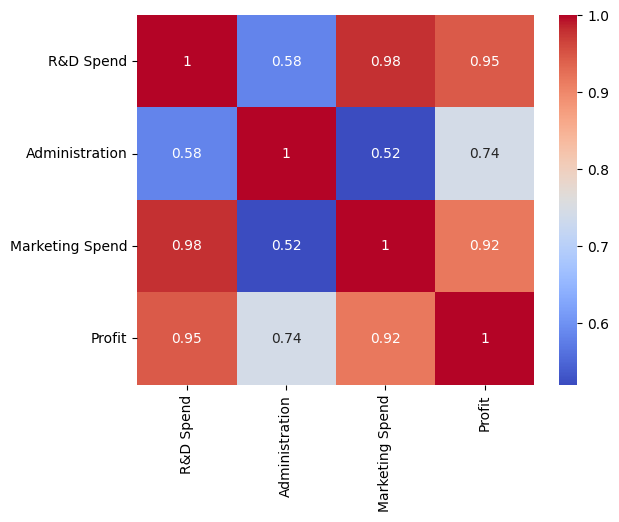

In [34]:
# 3 Data Visualisation- Correlation Matrix

# Exclude non-numeric columns
numeric_columns = companies.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [35]:
# 4 Encoding categorial data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()        # Create reusable class
X[:, 3] = labelencoder.fit_transform(X[:, 3])  # Convert "State" from string to integer

#onehotencoder = OneHotEncoder(categorical_features = [3])       # OneHotEncoding of "State"
#X = onehotencoder.fit_transform(X).toarray()

ct = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

# 5 Avoiding dummy variable trap (Remove extra cloumn)
X = X[:, 1:]


In [38]:
# 6 Spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# 7 Fitting Multiple Linear Regression Models into Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
# 8 Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.2814305 ,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645085,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.08266881,
        93745.66352058,  

In [42]:
# 9 Calculating the co-efficents and intercepts
print(regressor.coef_)
print(regressor.intercept_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.229724047706


In [48]:
# 10 Evaluate the model
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
accuracy

0.9112695892268908

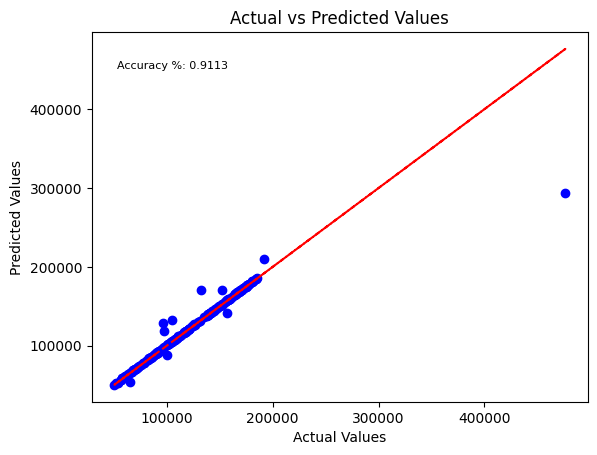

In [52]:
# Visualize the linear regression model
# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# Add accuracy percentage as a text annotation
accuracy_text = f'Accuracy %: {accuracy:.4f}'
plt.annotate(accuracy_text, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=8)

plt.show()
